# 1. 모델 로드

In [1]:
!pip install qwen-vl-utils
!pip install transformers==4.49
!pip install vllm==0.8.1


[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 147.4 kB/s eta 0:00:0000:010:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 959.0 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.45.1
    Uninstalling transformers-4.45.1:
      Successfully uninstalled transformers-4.45.1

[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python-headless to 

In [2]:
from transformers import AutoProcessor
from vllm import LLM, SamplingParams
from qwen_vl_utils import process_vision_info

MODEL_PATH = "HJUNN/Qwen2-VL-7B-Instruct-fashion-product-images-small-checkpoint-68"

llm = LLM(
    model = MODEL_PATH,
    trust_remote_code = True,
    limit_mm_per_prompt = {"image" : 10, "video" : 10},
    
)

INFO 09-08 14:26:35 [__init__.py:256] Automatically detected platform cuda.


config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

INFO 09-08 14:26:36 [config.py:2595] Downcasting torch.float32 to torch.float16.
INFO 09-08 14:26:45 [config.py:583] This model supports multiple tasks: {'embed', 'score', 'reward', 'generate', 'classify'}. Defaulting to 'generate'.
INFO 09-08 14:26:45 [config.py:1693] Chunked prefill is enabled with max_num_batched_tokens=8192.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

INFO 09-08 14:26:50 [core.py:53] Initializing a V1 LLM engine (v0.8.1) with config: model='HJUNN/Qwen2-VL-7B-Instruct-fashion-product-images-small-checkpoint-68', speculative_config=None, tokenizer='HJUNN/Qwen2-VL-7B-Instruct-fashion-product-images-small-checkpoint-68', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.float16, max_seq_len=32768, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar', reasoning_backend=None), observability_config=ObservabilityConfig(show_hidden_metrics=False, otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=None, served_model_name=HJUNN/Qwen2-VL-7B-Instruct-fashion-product-images-small-check

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


INFO 09-08 14:26:52 [gpu_model_runner.py:1164] Starting to load model HJUNN/Qwen2-VL-7B-Instruct-fashion-product-images-small-checkpoint-68...
WARNING 09-08 14:26:52 [vision.py:97] Current `vllm-flash-attn` has a bug inside vision module, so we use xformers backend instead. You can run `pip install flash-attn` to use flash-attention backend.
INFO 09-08 14:26:53 [config.py:3222] cudagraph sizes specified by model runner [1, 2, 4, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200, 208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 304, 312, 320, 328, 336, 344, 352, 360, 368, 376, 384, 392, 400, 408, 416, 424, 432, 440, 448, 456, 464, 472, 480, 488, 496, 504, 512] is overridden by config [512, 384, 256, 128, 4, 2, 1, 392, 264, 136, 8, 400, 272, 144, 16, 408, 280, 152, 24, 416, 288, 160, 32, 424, 296, 168, 40, 432, 304, 176, 48, 440, 312, 184, 56, 448, 320, 192, 64, 456, 328, 200, 72, 464, 336, 208, 80, 472, 344, 216, 88

model-00002-of-00018.safetensors:   0%|          | 0.00/2.18G [00:00<?, ?B/s]

model-00005-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00004-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00007-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00006-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00003-of-00018.safetensors:   0%|          | 0.00/1.76G [00:00<?, ?B/s]

model-00008-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00001-of-00018.safetensors:   0%|          | 0.00/1.99G [00:00<?, ?B/s]

model-00009-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00010-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00011-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00012-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00013-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00014-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00015-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00016-of-00018.safetensors:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

model-00017-of-00018.safetensors:   0%|          | 0.00/2.18G [00:00<?, ?B/s]

model-00018-of-00018.safetensors:   0%|          | 0.00/815M [00:00<?, ?B/s]

INFO 09-08 14:29:05 [weight_utils.py:273] Time spent downloading weights for HJUNN/Qwen2-VL-7B-Instruct-fashion-product-images-small-checkpoint-68: 131.783368 seconds


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/18 [00:00<?, ?it/s]


INFO 09-08 14:29:22 [loader.py:429] Loading weights took 17.42 seconds
INFO 09-08 14:29:23 [gpu_model_runner.py:1176] Model loading took 15.5313 GB and 150.067883 seconds
INFO 09-08 14:29:23 [gpu_model_runner.py:1421] Encoder cache will be initialized with a budget of 16384 tokens, and profiled with 1 image items of the maximum feature size.


chat_template.json: 0.00B [00:00, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (327680 > 32768). Running this sequence through the model will result in indexing errors


INFO 09-08 14:35:12 [backends.py:409] Using cache directory: /root/.cache/vllm/torch_compile_cache/1ed262b3bc/rank_0_0 for vLLM's torch.compile
INFO 09-08 14:35:12 [backends.py:419] Dynamo bytecode transform time: 6.43 s
INFO 09-08 14:35:16 [backends.py:132] Cache the graph of shape None for later use
INFO 09-08 14:35:40 [backends.py:144] Compiling a graph for general shape takes 27.48 s
INFO 09-08 14:35:57 [monitor.py:33] torch.compile takes 33.91 s in total
INFO 09-08 14:35:58 [kv_cache_utils.py:537] GPU KV cache size: 855,120 tokens
INFO 09-08 14:35:58 [kv_cache_utils.py:540] Maximum concurrency for 32,768 tokens per request: 26.10x
INFO 09-08 14:36:25 [gpu_model_runner.py:1499] Graph capturing finished in 27 secs, took 0.49 GiB
INFO 09-08 14:36:25 [core.py:138] init engine (profile, create kv cache, warmup model) took 422.46 seconds


# 2. 테스트 데이터 로드 및 전처리

In [20]:
import io
import json
from PIL import Image
from datasets import load_dataset
from sklearn.model_selection import train_test_split

#시스템(assistant)에게 주어진 역할
system_message = "당신은 이미지와 제품명으로부터 패션/스타일 정보를 추론하는 분류 모델입니다."

#실제로 사용자 입력 -> 모델이 답해야 하는 프롬프트
prompt = """입력 정보:
- name : {name}
- image : [image]

위 정보를 바탕으로, 아래 7가지 key에 대한 값을 JSON 형태로 추론해 주세요. :
1) gender
2) masterCategory
3) subCategory
4) season
5) usage
6) baseColour
7) articleType

출력 시 **아래 JSON 예시 형태**를 반드시 지키세요:

{{
    "gender" : "예시 값",
    "masterCategory" : "예시 값",
    "subCategory" : "예시 값",
    "season" : "예시 값",
    "usage" : "예시 값",
    "baseColour" : "예시 값",
    "articleType" : "예시 값",
}}

#예시
{{
    "gender" : "Men",
    "masterCategory" : "Accessories",
    "subCategory" : "Eyewear",
    "season" : "Winter",
    "usage" : "Causal",
    "baseColour" : "Blue",
    "articleType" : "Sunglasses",
}}
#주의
- 7개 항목 이외의 정보(텍스트, 문장 등)는 절대 포함하지 마세요.
"""
def combine_cols_to_label(example):  # 여러 칼럼에 분산된 패션 속성 정보를 하나의 JSON 형태 레이블로 통합
    # 실제 컬럼명에 맞게 수정
    label_dict = {
        "gender" : example["gender"],
        "masterCategory" : example["masterCategory"],
        "subCategory" : example["subCategory"],
        "season" : example["season"],
        "usage" : example["usage"],
        "baseColour" : example["baseColour"],
        "articleType" : example["articleType"],
    }
    example["label"] = json.dumps(label_dict, ensure_ascii = False) # json.dumps() -> dict, list 등을 JSON 문자열로 변환
    return example

def format_data(sample):  #OpenAI 형식의 대화 구조로 변환
    #Image.Image를 PngImageFile로 변환
    buffer = io.BytesIO()       # 메모리 상에서 이미지를 PNG 형태로 변환한 후 다시 로드
    sample["image"].save(buffer, format = "PNG")
    buffer.seek(0)
    image = Image.open(buffer)

    return {
        "messages" : [
            {"role" : "system",
             "content" : [
                 {
                     "type" : "text",
                     "text" : system_message
                 }
             ],
            },
            {"role" : "user",
             "content" : [
                 {
                     "type" : "text",
                     "text" : prompt.format(name = sample["productDisplayName"]),
                 },
                 {
                     "type" : "image",
                     "image" : image,
                 }
            ],
            },
            {
                "role" : "assistant",
                "content" : [
                    {
                        "type" : "text",
                        "text" : sample["label"],
                    }
                ]
            }
        ]
    }

dataset = load_dataset("ashraq/fashion-product-images-small", split = "train")
dataset_add_label = dataset.map(combine_cols_to_label)
dataset_add_label = dataset_add_label.shuffle(seed = 4242)

formatted_dataset = [format_data(row) for row in dataset_add_label]
train_dataset, test_dataset = train_test_split(formatted_dataset, test_size = 0.9, random_state = 42)


# 3. 임의의 샘플 한 개 인퍼런스

In [21]:
from IPython.display import display

model_id = "Qwen/Qwen2-VL-7B-Instruct"
processor = AutoProcessor.from_pretrained(model_id)

sampling_params = SamplingParams(
    temperature = 0.1,
    top_p = 0.001,
    repetition_penalty = 1.05,
    max_tokens = 256,
    stop_token_ids = []
)

In [22]:
test_sample = test_dataset[33]["messages"]
test_sample_prompt = processor.apply_chat_template(
    test_sample,
    tokenize = False,
    add_generation_prompt = False
)

In [23]:
print('<|im_start|>assistant' in test_sample_prompt)  # False이면 없는 것
print(test_sample_prompt)


True
<|im_start|>system
당신은 이미지와 제품명으로부터 패션/스타일 정보를 추론하는 분류 모델입니다.<|im_end|>
<|im_start|>user
입력 정보:
- name : Gas Men Sahar Beige Shoes
- image : [image]

위 정보를 바탕으로, 아래 7가지 key에 대한 값을 JSON 형태로 추론해 주세요. :
1) gender
2) masterCategory
3) subCategory
4) season
5) usage
6) baseColour
7) articleType

출력 시 **아래 JSON 예시 형태**를 반드시 지키세요:

{
    "gender" : "예시 값",
    "masterCategory" : "예시 값",
    "subCategory" : "예시 값",
    "season" : "예시 값",
    "usage" : "예시 값",
    "baseColour" : "예시 값",
    "articleType" : "예시 값",
}

#예시
{
    "gender" : "Men",
    "masterCategory" : "Accessories",
    "subCategory" : "Eyewear",
    "season" : "Winter",
    "usage" : "Causal",
    "baseColour" : "Blue",
    "articleType" : "Sunglasses",
}
#주의
- 7개 항목 이외의 정보(텍스트, 문장 등)는 절대 포함하지 마세요.
<|vision_start|><|image_pad|><|vision_end|><|im_end|>
<|im_start|>assistant
{"gender": "Men", "masterCategory": "Footwear", "subCategory": "Shoes", "season": "Summer", "usage": "Casual", "baseColour": "Beige", "articleType": "Ca

In [24]:
def split_input_and_label(prompt):
    input = prompt.split('<|im_start|>assistant')[0] + '<|im_start|>assistant'
    label = prompt.split('<|im_start|>assistant')[1]
    return input, label
test_sample_input, test_sample_label = split_input_and_label(test_sample_prompt)

In [25]:
print(test_sample_input)

<|im_start|>system
당신은 이미지와 제품명으로부터 패션/스타일 정보를 추론하는 분류 모델입니다.<|im_end|>
<|im_start|>user
입력 정보:
- name : Gas Men Sahar Beige Shoes
- image : [image]

위 정보를 바탕으로, 아래 7가지 key에 대한 값을 JSON 형태로 추론해 주세요. :
1) gender
2) masterCategory
3) subCategory
4) season
5) usage
6) baseColour
7) articleType

출력 시 **아래 JSON 예시 형태**를 반드시 지키세요:

{
    "gender" : "예시 값",
    "masterCategory" : "예시 값",
    "subCategory" : "예시 값",
    "season" : "예시 값",
    "usage" : "예시 값",
    "baseColour" : "예시 값",
    "articleType" : "예시 값",
}

#예시
{
    "gender" : "Men",
    "masterCategory" : "Accessories",
    "subCategory" : "Eyewear",
    "season" : "Winter",
    "usage" : "Causal",
    "baseColour" : "Blue",
    "articleType" : "Sunglasses",
}
#주의
- 7개 항목 이외의 정보(텍스트, 문장 등)는 절대 포함하지 마세요.
<|vision_start|><|image_pad|><|vision_end|><|im_end|>
<|im_start|>assistant


In [27]:
print(test_sample_label)


{"gender": "Men", "masterCategory": "Footwear", "subCategory": "Shoes", "season": "Summer", "usage": "Casual", "baseColour": "Beige", "articleType": "Casual Shoes"}<|im_end|>



In [28]:
# 이미지만 따로 전처리
test_sample_image_inputs, test_sample_video_inputs = process_vision_info(test_sample)

In [29]:
test_sample_image_inputs

[<PIL.Image.Image image mode=RGB size=56x84>]

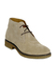

In [30]:
display(test_sample_image_inputs[0])

In [32]:
test_sample_video_inputs

In [33]:
# 멀티 모달 데이터를 처리하기 위한 전처리
mm_data = {} # 멀티 모달 데이터 딕셔너리
if test_sample_image_inputs is not None:
    mm_data["image"] = test_sample_image_inputs
if test_sample_video_inputs is not None:
    mm_data["image"] = test_sample_video_inputs

In [34]:
llm_inputs = {
    "prompt" : test_sample_input,
    "multi_modal_data" : mm_data,
}

In [36]:
outputs = llm.generate([llm_inputs], sampling_params = sampling_params)
generated_text = outputs[0].outputs[0].text

print('모델의 예측:')
print(generated_text.strip())

print('레이블')
print(test_sample_label.strip())

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s, est. speed input: 448.66 toks/s, output: 75.71 toks/s]

모델의 예측:
>{"gender": "Men", "masterCategory": "Footwear", "subCategory": "Shoes", "season": "Summer", "usage": "Casual", "baseColour": "Beige", "articleType": "Casual Shoes"}
레이블
{"gender": "Men", "masterCategory": "Footwear", "subCategory": "Shoes", "season": "Summer", "usage": "Casual", "baseColour": "Beige", "articleType": "Casual Shoes"}<|im_end|>


# 4. 다수의 데이터 호출

In [37]:
# 상위 50개 테스트 데이터 추출
test_samples = test_dataset[:50]

#배치 인퍼런스를 위한 입력 데이터 준비
batch_inputs = []
batch_labels = []

for sample in test_samples:
    # 각 샘플의 메시지 처리
    messages = sample["messages"]

    #프롬프트 생성
    prompt = processor.apply_chat_template(
        messages,
        tokenize = False,
        add_generation_prompt = False
    )
    # 입력과 레이블 분리
    input_part = prompt.split('<|im_start|>assistant')[0] + '<|im_start|>assistant'
    label_part = prompt.split('<|im_start|>assistant')[1]

    #이미지/비디오 데이터 처리
    image_inputs, video_inputs = process_vision_info(messages)

    # 멀티모달 데이터 구성
    mm_data = {}
    if image_inputs is not None:
        mm_data["image"] = image_inputs
    if video_inputs is not None:
        mm_data["video"] = video_inputs

    # LLM 입력 데이터 구성
    llm_input = {
        "prompt" : input_part,
        "multi_modal_data" : mm_data,
    }
    batch_inputs.append(llm_input)
    batch_labels.append(label_part)

In [38]:
#배치 인퍼런스 실행
print("배치 인퍼런스 시작...")
outputs = llm.generate(batch_inputs, sampling_params = sampling_params)

배치 인퍼런스 시작...


Processed prompts: 100%|██████████| 50/50 [00:00<00:00, 71.56it/s, est. speed input: 23063.82 toks/s, output: 2924.03 toks/s]


# 5. 모델 평가 (테스트 데이터 50건)

In [40]:
import json
from sklearn.metrics import f1_score
from collections import defaultdict

def calculate_f1_scores(outputs, batch_labels):
    """각 key 별로 F1 score를 계산하는 함수"""
    # 각 키별로 예측값과 실제값을 저장할 딕셔너리
    predictions_by_key = defaultdict(list)
    labels_by_key = defaultdict(list)

    for i, output in enumerate(outputs):
        # 모델 예측 결과 파싱
        try : 
            pred_text = output.outputs[0].text.strip()
            pred_json = json.loads(pred_text)
        except:
            print(f"샘플 {i+1} : 예측 결과 JSON 파싱 실패")
            continue
        #실제 레이블 파싱
        try:
            label_text = batch_labels[i].strip()
            # <|im_end|> 제거
            if label_text.endswith('<|im_end|>'):
                label_text = label_text[:-10]
            label_json = json.loads(label_text)
        except:
            print(f"샘플 {i+1}: 레이블 JSON 파싱 실패")
            continue

        # 각 키별로 예측값과 실제값 저장
        for key in label_json.keys():
            if key in pred_json:
                predictions_by_key[key].append(pred_json[key])
                labels_by_key[key].append(label_json[key])
            else:
                print(f"샘플 {i+1}: 키 '{key}' 예측 결과에 없음")

    #각 키별로 F1 score 계산
    f1_scores = {}
    for key in labels_by_key.keys():
        if len(labels_by_key[key]) > 0:
            # 고유한 라벨들 확인
            unique_labels = list(set(labels_by_key[key] + predictions_by_key[key]))
            if len(unique_labels) == 1:
                # 모든 값이 동일한 경우
                f1_scores[key] = 1.0
            else:
                #F1_score 계산 (macro average)
                f1_scores[key] = f1_score(
                    labels_by_key[key],
                    predictions_by_key[key],
                    labels = unique_labels,
                    average = 'macro',
                    zero_division = 0
                )
    return f1_scores, predictions_by_key, labels_by_key
# F1 score 계산 실행
f1_results, preds_by_key, labels_by_key = calculate_f1_scores(outputs, batch_labels)

#결과 출력
print("\n === F1 Score 결과 ===")
print(f"{'Key':<15} {'F1 Score':<10} {'샘플 수':<8}")
print("-" * 35)

for key, score in f1_results.items():
    sample_count = len(labels_by_key[key])
    print(f"{key:<15} {score:.4f}  {sample_count}")

# 전체 평균 F1 score
if f1_results:
    avg_f1 = sum(f1_results.values())/len(f1_results)
    print("-" * 35)
    print(f"{'평균 F1':<15} {avg_f1:.4f}")

#각 키별 상세 결과(옵션)
print("\n ==== 상세 결과 ====")
for key in f1_results.keys():
    correct = sum(1 for p, l in zip(preds_by_key[key], labels_by_key[key]) if p == l)
    total = len(labels_by_key[key])
    accuracy = correct / total if total > 0 else 0
    print(f"{key} : 정확도 {accuracy:.4f} ({correct}/{total})")

샘플 1 : 예측 결과 JSON 파싱 실패
샘플 2 : 예측 결과 JSON 파싱 실패
샘플 3 : 예측 결과 JSON 파싱 실패
샘플 4 : 예측 결과 JSON 파싱 실패
샘플 5 : 예측 결과 JSON 파싱 실패
샘플 7 : 예측 결과 JSON 파싱 실패
샘플 8 : 예측 결과 JSON 파싱 실패
샘플 9 : 예측 결과 JSON 파싱 실패
샘플 10 : 예측 결과 JSON 파싱 실패
샘플 11 : 예측 결과 JSON 파싱 실패
샘플 12 : 예측 결과 JSON 파싱 실패
샘플 13 : 예측 결과 JSON 파싱 실패
샘플 14 : 예측 결과 JSON 파싱 실패
샘플 15 : 예측 결과 JSON 파싱 실패
샘플 16 : 예측 결과 JSON 파싱 실패
샘플 17 : 예측 결과 JSON 파싱 실패
샘플 18 : 예측 결과 JSON 파싱 실패
샘플 19 : 예측 결과 JSON 파싱 실패
샘플 20 : 예측 결과 JSON 파싱 실패
샘플 21 : 예측 결과 JSON 파싱 실패
샘플 22 : 예측 결과 JSON 파싱 실패
샘플 24 : 예측 결과 JSON 파싱 실패
샘플 25 : 예측 결과 JSON 파싱 실패
샘플 26 : 예측 결과 JSON 파싱 실패
샘플 27 : 예측 결과 JSON 파싱 실패
샘플 28 : 예측 결과 JSON 파싱 실패
샘플 29 : 예측 결과 JSON 파싱 실패
샘플 32 : 예측 결과 JSON 파싱 실패
샘플 33 : 예측 결과 JSON 파싱 실패
샘플 34 : 예측 결과 JSON 파싱 실패
샘플 35 : 예측 결과 JSON 파싱 실패
샘플 36 : 예측 결과 JSON 파싱 실패
샘플 37 : 예측 결과 JSON 파싱 실패
샘플 38 : 예측 결과 JSON 파싱 실패
샘플 39 : 예측 결과 JSON 파싱 실패
샘플 43 : 예측 결과 JSON 파싱 실패
샘플 44 : 예측 결과 JSON 파싱 실패
샘플 45 : 예측 결과 JSON 파싱 실패
샘플 46 : 예측 결과 JSON 파싱 실패
샘플 47 : 예측 결과 JSON 파싱 실패
샘플 48 : 